# Soft Clustering of Songs using Fuzzy C-Means

## Objective
The goal of this project is to group songs into genres using **Fuzzy C-Means clustering**.  
Unlike hard clustering (e.g., K-Means), each song can belong to multiple clusters with different membership degrees. This better reflects the reality of music, where songs often share characteristics with multiple genres.

---

## Dataset: Spotify Tracks
- **Source:** [Kaggle - Spotify Dataset](https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db)
- **Description:** Contains audio features for thousands of songs.
- **Features Used:**
  - Danceability
  - Energy
  - Loudness
  - Acousticness
  - Instrumentalness
  - Liveness
  - Valence
  - Tempo
- **Target:** Unsupervised — no explicit genre labels required.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz
#Import the data
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('SpotifyFeatures.csv')
# Select relevant features
features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
songs_df = df[features].dropna()

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(songs_df)


Saving SpotifyFeatures.csv to SpotifyFeatures.csv


In [6]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


## 1. Theory: Fuzzy C-Means

**Idea:**
Fuzzy C-Means (FCM) allows each data point to belong to multiple clusters with varying membership values.

**Steps:**
1. Initialize membership matrix `U` with random values (sum of memberships per point = 1).
2. Compute cluster centroids:
\[
c_j = \frac{\sum_{i=1}^n u_{ij}^m x_i}{\sum_{i=1}^n u_{ij}^m}
\]
3. Update membership values:
\[
u_{ij} = \frac{1}{\sum_{k=1}^c \left( \frac{\|x_i - c_j\|}{\|x_i - c_k\|} \right)^{\frac{2}{m-1}}}
\]
4. Repeat until convergence.

**Parameters:**
- \( m \): fuzziness parameter (usually 2)
- \( c \): number of clusters
- \( u_{ij} \): membership of point \( i \) in cluster \( j \)

**Advantage:**  
Captures overlap between categories, useful for music genre classification.


In [7]:
# Number of clusters
n_clusters = 5
fuzziness = 2

# Apply Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, c=n_clusters, m=fuzziness, error=0.005, maxiter=1000, init=None
)

# Hard cluster labels (optional)
cluster_labels = np.argmax(u, axis=0)

print(f"Fuzzy Partition Coefficient (FPC): {fpc}")


Fuzzy Partition Coefficient (FPC): 0.2616698674862634


## 2. Analyzing Cluster Membership
We can view the membership degrees for each song and interpret the soft clustering results.


In [8]:
# Membership matrix
membership_df = pd.DataFrame(u.T, columns=[f"Cluster_{i}" for i in range(n_clusters)])
membership_df['Dominant_Cluster'] = cluster_labels

# Show first few songs with their membership degrees
membership_df.head()


,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Dominant_Cluster
0,0.255805,0.255809,0.174895,0.057681,0.255810,4
1,0.275656,0.275751,0.136374,0.036500,0.275718,1
2,0.155521,0.155475,0.381435,0.152079,0.155491,2
3,0.179844,0.179745,0.293448,0.167179,0.179784,2
4,0.133889,0.133832,0.274801,0.323624,0.133854,3


## 3. Visualizing Clusters in 2D
We reduce the feature space using PCA for visualization.


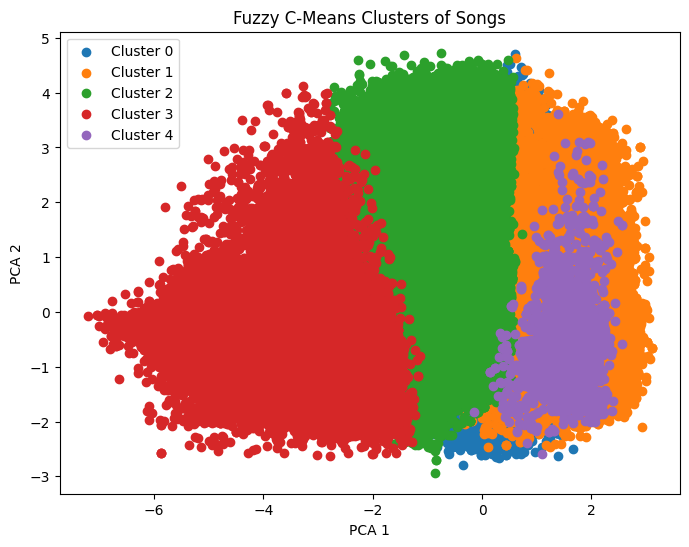

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for cluster in range(n_clusters):
    plt.scatter(X_pca[cluster_labels == cluster, 0], X_pca[cluster_labels == cluster, 1], label=f"Cluster {cluster}")
plt.title("Fuzzy C-Means Clusters of Songs")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()


## 4. Conclusion
- **Fuzzy C-Means** allowed songs to belong to multiple genres with different probabilities.
- The **Fuzzy Partition Coefficient (FPC)** indicates clustering quality (closer to 1 is better).
- This method is well-suited for music data, where genres overlap.

**Next Steps:**
- Map clusters to actual genres using labeled datasets.
- Explore different values of `m` and `n_clusters`.


In [4]:
s!pip install scikit-fuzzy